## Perangkingan Kalimat Berita dengan Method Page Rank

**Penjelasan Scrapy**

Scrapy adalah web crawling dan web scraping framework tingkat tinggi yang cepat, digunakan untuk merayapi situs web dan mengekstrak data terstruktur dari halaman mereka. Ini dapat digunakan untuk berbagai tujuan, mulai dari penambangan data hingga pemantauan dan pengujian otomatis.

In [75]:
!pip install scrapy
!pip install crochet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import scrapy

In [77]:
import scrapy
from scrapy.crawler import CrawlerRunner
import re
from crochet import setup, wait_for
setup()

class QuotesToCsv(scrapy.Spider):
    name = "MJKQuotesToCsv"
    start_urls = [
        'https://nasional.tempo.co/read/1643890/jokowi-lantik-heru-budi-hartono-gantikan-anies-baswedan-senin-pekan-depan',
    ]
    custom_settings = {
        'ITEM_PIPELINES': {
            '__main__.ExtractFirstLine': 1
        },
        'FEEDS': {
            'news.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }
    }

    def parse(self, response):
        """parse data from urls"""
        for quote in response.css('#isi > p'):
            yield {'news': quote.extract()}


class ExtractFirstLine(object):
    def process_item(self, item, spider):
        """text processing"""
        lines = dict(item)["news"].splitlines()
        first_line = self.__remove_html_tags__(lines[0])

        return {'news': first_line}

    def __remove_html_tags__(self, text):
        """remove html tags from string"""
        html_tags = re.compile('<.*?>')
        return re.sub(html_tags, '', text)

@wait_for(10)
def run_spider():
    """run spider with MJKQuotesToCsv"""
    crawler = CrawlerRunner()
    d = crawler.crawl(QuotesToCsv)
    return d

In [78]:
run_spider()


It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on how to handle this deprecation.


Mengambil dan Membaca data CSV yang bernama news.csv

In [79]:
dataNews = pd.read_csv('news.csv')
dataNews

,news
0,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ..."
1,"""Iya betul (dilantik 17 Oktober),"" ujar Heru s..."
2,"Sebelumnya, Kepala Pusat Penerangan (Kapuspen)..."
3,"Adapun ketiga orang tersebut, antara lain Heru..."
4,"Sekilas mengenai Heru Budi Hartono, dia menjab..."
5,"Pada 2008, Heru Budi Hartono menjabat sebagai ..."
6,Baca juga: Jokowi Beberkan Sejumlah Alasan Pi...
7,M JULNIS FIRMANSYAH


PyPDF2 adalah pustaka PDF python murni gratis dan open-source yang mampu memisahkan, menggabungkan , memotong, dan mengubah halaman file PDF.

Install PyPDF2

In [80]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import PyPDF2

Membaca Pdf dari file lalu dibuat menjadi bentuk document Text

In [82]:
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/webmining/news.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

'news\nTEMPO.CO,\nJakarta -\nPresiden Joko\nWidodo atau\nJokowi\ndipastikan\nbakal melantik\nKepala\nSekretariat\nPresiden Heru\nBudi Hartono\nmenjadi\nPenjabat atau\nPj Gubernur\nDKI Jakarta\npada Senin\npekan depan,\n17 Oktober\n2022. Heru\nbakal dilantik\nmenggantikan\nAnies\nBaswedan\nyang lengser\nsebagai\nGubernur DKI\nJakarta pada\n16 Oktober\n2022. \n"Iya betul\n(dilantik 17\nOktober)," ujar\nHeru saat\ndihubungi,\nSelasa, 11\nOktober\n2022. \nSebelumnya,\nKepala Pusat\nPenerangan\n(Kapuspen)\nKementerian\nDalam Negeri\n(Kemendagri)\nBenni Irwan\nmengatakan\nsidang Tim\nPenilai Akhir\n(TPA) untuk\nmemilih Pj\nGubernur\nDKI Jakarta\nberlangsung\npada Jumat, 7\nOktober 2022.\nSidang itu\nmenentukan\nsatu nama\ndari tiga Pj\nGubernur.'

PunktSentenceTokenizer adalah Sebuah tokenizer kalimat yang menggunakan algoritma tanpa pengawasan untuk membangun model untuk kata-kata singkatan, kolokasi, dan kata-kata yang memulai kalimat dan kemudian menggunakan model itu untuk menemukan batas kalimat.

In [83]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [84]:
def tokenize(document):
    # Kita memecahnya menggunakan  PunktSentenceTokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [85]:
sentences_list = tokenize(document)
sentences_list

['news\nTEMPO.CO,\nJakarta -\nPresiden Joko\nWidodo atau\nJokowi\ndipastikan\nbakal melantik\nKepala\nSekretariat\nPresiden Heru\nBudi Hartono\nmenjadi\nPenjabat atau\nPj Gubernur\nDKI Jakarta\npada Senin\npekan depan,\n17 Oktober\n2022.',
 'Heru\nbakal dilantik\nmenggantikan\nAnies\nBaswedan\nyang lengser\nsebagai\nGubernur DKI\nJakarta pada\n16 Oktober\n2022.',
 '"Iya betul\n(dilantik 17\nOktober)," ujar\nHeru saat\ndihubungi,\nSelasa, 11\nOktober\n2022.',
 'Sebelumnya,\nKepala Pusat\nPenerangan\n(Kapuspen)\nKementerian\nDalam Negeri\n(Kemendagri)\nBenni Irwan\nmengatakan\nsidang Tim\nPenilai Akhir\n(TPA) untuk\nmemilih Pj\nGubernur\nDKI Jakarta\nberlangsung\npada Jumat, 7\nOktober 2022.',
 'Sidang itu\nmenentukan\nsatu nama\ndari tiga Pj\nGubernur.']

Merapikan data di atas sehingga lebih enak dibaca

In [86]:
kal=1
for i in sentences_list:
    print('\nKalimat {}'.format(kal))
    kal+=1
    print(i)


Kalimat 1
news
TEMPO.CO,
Jakarta -
Presiden Joko
Widodo atau
Jokowi
dipastikan
bakal melantik
Kepala
Sekretariat
Presiden Heru
Budi Hartono
menjadi
Penjabat atau
Pj Gubernur
DKI Jakarta
pada Senin
pekan depan,
17 Oktober
2022.

Kalimat 2
Heru
bakal dilantik
menggantikan
Anies
Baswedan
yang lengser
sebagai
Gubernur DKI
Jakarta pada
16 Oktober
2022.

Kalimat 3
"Iya betul
(dilantik 17
Oktober)," ujar
Heru saat
dihubungi,
Selasa, 11
Oktober
2022.

Kalimat 4
Sebelumnya,
Kepala Pusat
Penerangan
(Kapuspen)
Kementerian
Dalam Negeri
(Kemendagri)
Benni Irwan
mengatakan
sidang Tim
Penilai Akhir
(TPA) untuk
memilih Pj
Gubernur
DKI Jakarta
berlangsung
pada Jumat, 7
Oktober 2022.

Kalimat 5
Sidang itu
menentukan
satu nama
dari tiga Pj
Gubernur.


Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
vectorizer = CountVectorizer()
cv_matrix=vectorizer.fit_transform(sentences_list)

Menampilkan jumlah Kosa Kata dari Data

In [88]:
print ("Banyaknya kosa kata = ", len((vectorizer.get_feature_names_out())))

Banyaknya kosa kata =  70


Menampilkan jumlah Kalimat dari Data

In [89]:
print ("Banyaknya kalimat = ", (len(sentences_list)))

Banyaknya kalimat =  5


Menampilkan Kosa Kata dari Data



In [90]:
print ("kosa kata = ", (vectorizer.get_feature_names_out()))

kosa kata =  ['11' '16' '17' '2022' 'akhir' 'anies' 'atau' 'bakal' 'baswedan' 'benni'
 'berlangsung' 'betul' 'budi' 'co' 'dalam' 'dari' 'depan' 'dihubungi'
 'dilantik' 'dipastikan' 'dki' 'gubernur' 'hartono' 'heru' 'irwan' 'itu'
 'iya' 'jakarta' 'joko' 'jokowi' 'jumat' 'kapuspen' 'kemendagri'
 'kementerian' 'kepala' 'lengser' 'melantik' 'memilih' 'menentukan'
 'mengatakan' 'menggantikan' 'menjadi' 'nama' 'negeri' 'news' 'oktober'
 'pada' 'pekan' 'penerangan' 'penilai' 'penjabat' 'pj' 'presiden' 'pusat'
 'saat' 'satu' 'sebagai' 'sebelumnya' 'sekretariat' 'selasa' 'senin'
 'sidang' 'tempo' 'tiga' 'tim' 'tpa' 'ujar' 'untuk' 'widodo' 'yang']


In [91]:
# mengubah kumpulan dokumen mentah menjadi matriks fitur TF-IDF
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.14610397 0.10202413 0.         0.
  0.36218421 0.14610397 0.         0.         0.         0.
  0.1810921  0.1810921  0.         0.         0.1810921  0.
  0.         0.1810921  0.12127949 0.10202413 0.1810921  0.12127949
  0.         0.         0.         0.24255898 0.1810921  0.1810921
  0.         0.         0.         0.         0.14610397 0.
  0.1810921  0.         0.         0.         0.         0.1810921
  0.         0.         0.1810921  0.10202413 0.12127949 0.1810921
  0.         0.         0.1810921  0.12127949 0.36218421 0.
  0.         0.         0.         0.         0.1810921  0.
  0.1810921  0.         0.1810921  0.         0.         0.
  0.         0.         0.1810921  0.        ]
 [0.         0.30085447 0.         0.16949616 0.         0.30085447
  0.         0.24272749 0.30085447 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.24272749 0.         0.20148574 0.16949616 0.         0.20148574
  0.    

Menampilkan Jumlah Kalimat dan Kosa Kata

In [92]:
normal_matrix.shape

(5, 70)

NetworkX adalah paket Python untuk pembuatan, manipulasi, dan studi tentang struktur, dinamika, dan fungsi jaringan yang kompleks. Ini menyediakan:

In [93]:
import networkx as nx

Graph adalah kumpulan dati titik (node) dan garis dimana pasangan – pasangan titik (node) tersebut dihubungkan oleh segmen garis. Node ini biasa disebut simpul (vertex) dan segmen garis disebut ruas (edge)

In [94]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 2)	0.11555638149236828
  (0, 1)	0.20952198781058418
  (0, 4)	0.05092958582371007
  (0, 3)	0.1450626820681297
  (0, 0)	1.0000000000000002
  (1, 4)	0.03506340622306105
  (1, 2)	0.1919777442329807
  (1, 3)	0.1439925634396477
  (1, 0)	0.20952198781058418
  (1, 1)	1.0
  (2, 3)	0.06168876768739075
  (2, 1)	0.1919777442329807
  (2, 0)	0.11555638149236828
  (2, 2)	0.9999999999999997
  (3, 2)	0.06168876768739075
  (3, 1)	0.1439925634396477
  (3, 0)	0.1450626820681297
  (3, 4)	0.10836550400289105
  (3, 3)	1.0000000000000004
  (4, 1)	0.03506340622306105
  (4, 0)	0.05092958582371007
  (4, 3)	0.10836550400289105
  (4, 4)	0.9999999999999996


In [95]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

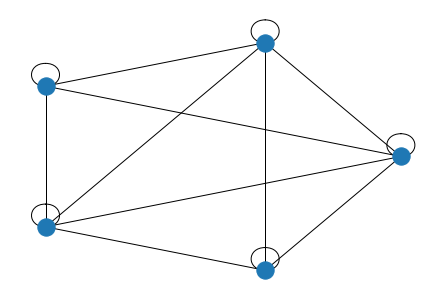

In [96]:
nx.draw_circular(nx_graph)

Jumlah Banyak Sisi

In [97]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))

Banyaknya sisi 14


Menkalikan data dengan data Transpose

In [98]:
res_graph = normal_matrix * normal_matrix.T

PageRank menghitung peringkat node dalam grafik G berdasarkan struktur tautan masuk. Awalnya dirancang sebagai algoritma untuk menentukan peringkat halaman web.

In [99]:
ranks=nx.pagerank(nx_graph,)

memasukkan data ke array

In [100]:
arrRank=[]
for i in ranks:
    arrRank.append(ranks[i])

menjadikan data kedalam bentuk tabel lalu digabungkan

In [101]:
dfRanks = pd.DataFrame(arrRank,columns=['PageRank'])
dfSentence = pd.DataFrame(sentences_list,columns=['News'])
dfJoin = pd.concat([dfSentence,dfRanks], axis=1)
dfJoin

,News,PageRank
0,"news\nTEMPO.CO,\nJakarta -\nPresiden Joko\nWid...",0.207809
1,Heru\nbakal dilantik\nmenggantikan\nAnies\nBas...,0.213826
2,"""Iya betul\n(dilantik 17\nOktober),"" ujar\nHer...",0.191981
3,"Sebelumnya,\nKepala Pusat\nPenerangan\n(Kapusp...",0.203315
4,Sidang itu\nmenentukan\nsatu nama\ndari tiga P...,0.183068


Mengurutkan data berdasarkan hasil tertinggi

In [102]:
sortSentence=dfJoin.sort_values(by=['PageRank'],ascending=False)
sortSentence

,News,PageRank
1,Heru\nbakal dilantik\nmenggantikan\nAnies\nBas...,0.213826
0,"news\nTEMPO.CO,\nJakarta -\nPresiden Joko\nWid...",0.207809
3,"Sebelumnya,\nKepala Pusat\nPenerangan\n(Kapusp...",0.203315
2,"""Iya betul\n(dilantik 17\nOktober),"" ujar\nHer...",0.191981
4,Sidang itu\nmenentukan\nsatu nama\ndari tiga P...,0.183068


Menampilkan data dari 5 ke atas

In [103]:
sortSentence.head(5)

,News,PageRank
1,Heru\nbakal dilantik\nmenggantikan\nAnies\nBas...,0.213826
0,"news\nTEMPO.CO,\nJakarta -\nPresiden Joko\nWid...",0.207809
3,"Sebelumnya,\nKepala Pusat\nPenerangan\n(Kapusp...",0.203315
2,"""Iya betul\n(dilantik 17\nOktober),"" ujar\nHer...",0.191981
4,Sidang itu\nmenentukan\nsatu nama\ndari tiga P...,0.183068


**Latent Semantic Indexing(LSI) Topik Berita**

In [104]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import PyPDF2

In [108]:
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/webmining/news.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
print(document)

news
TEMPO.CO,
Jakarta -
Presiden Joko
Widodo atau
Jokowi
dipastikan
bakal melantik
Kepala
Sekretariat
Presiden Heru
Budi Hartono
menjadi
Penjabat atau
Pj Gubernur
DKI Jakarta
pada Senin
pekan depan,
17 Oktober
2022. Heru
bakal dilantik
menggantikan
Anies
Baswedan
yang lengser
sebagai
Gubernur DKI
Jakarta pada
16 Oktober
2022. 
"Iya betul
(dilantik 17
Oktober)," ujar
Heru saat
dihubungi,
Selasa, 11
Oktober
2022. 
Sebelumnya,
Kepala Pusat
Penerangan
(Kapuspen)
Kementerian
Dalam Negeri
(Kemendagri)
Benni Irwan
mengatakan
sidang Tim
Penilai Akhir
(TPA) untuk
memilih Pj
Gubernur
DKI Jakarta
berlangsung
pada Jumat, 7
Oktober 2022.
Sidang itu
menentukan
satu nama
dari tiga Pj
Gubernur.


In [109]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
word_tokens = word_tokenize(document)
print(word_tokens)

['news', 'TEMPO.CO', ',', 'Jakarta', '-', 'Presiden', 'Joko', 'Widodo', 'atau', 'Jokowi', 'dipastikan', 'bakal', 'melantik', 'Kepala', 'Sekretariat', 'Presiden', 'Heru', 'Budi', 'Hartono', 'menjadi', 'Penjabat', 'atau', 'Pj', 'Gubernur', 'DKI', 'Jakarta', 'pada', 'Senin', 'pekan', 'depan', ',', '17', 'Oktober', '2022', '.', 'Heru', 'bakal', 'dilantik', 'menggantikan', 'Anies', 'Baswedan', 'yang', 'lengser', 'sebagai', 'Gubernur', 'DKI', 'Jakarta', 'pada', '16', 'Oktober', '2022', '.', '``', 'Iya', 'betul', '(', 'dilantik', '17', 'Oktober', ')', ',', "''", 'ujar', 'Heru', 'saat', 'dihubungi', ',', 'Selasa', ',', '11', 'Oktober', '2022', '.', 'Sebelumnya', ',', 'Kepala', 'Pusat', 'Penerangan', '(', 'Kapuspen', ')', 'Kementerian', 'Dalam', 'Negeri', '(', 'Kemendagri', ')', 'Benni', 'Irwan', 'mengatakan', 'sidang', 'Tim', 'Penilai', 'Akhir', '(', 'TPA', ')', 'untuk', 'memilih', 'Pj', 'Gubernur', 'DKI', 'Jakarta', 'berlangsung', 'pada', 'Jumat', ',', '7', 'Oktober', '2022', '.', 'Sidang', '

In [111]:
import os
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [112]:
stop_words = set(stopwords.words('indonesian'))
word_tokens_no_stopwords = [w for w in word_tokens if not w in stop_words]
print(word_tokens_no_stopwords)

['news', 'TEMPO.CO', ',', 'Jakarta', '-', 'Presiden', 'Joko', 'Widodo', 'Jokowi', 'melantik', 'Kepala', 'Sekretariat', 'Presiden', 'Heru', 'Budi', 'Hartono', 'Penjabat', 'Pj', 'Gubernur', 'DKI', 'Jakarta', 'Senin', 'pekan', ',', '17', 'Oktober', '2022', '.', 'Heru', 'dilantik', 'menggantikan', 'Anies', 'Baswedan', 'lengser', 'Gubernur', 'DKI', 'Jakarta', '16', 'Oktober', '2022', '.', '``', 'Iya', '(', 'dilantik', '17', 'Oktober', ')', ',', "''", 'Heru', 'dihubungi', ',', 'Selasa', ',', '11', 'Oktober', '2022', '.', 'Sebelumnya', ',', 'Kepala', 'Pusat', 'Penerangan', '(', 'Kapuspen', ')', 'Kementerian', 'Dalam', 'Negeri', '(', 'Kemendagri', ')', 'Benni', 'Irwan', 'sidang', 'Tim', 'Penilai', 'Akhir', '(', 'TPA', ')', 'memilih', 'Pj', 'Gubernur', 'DKI', 'Jakarta', 'Jumat', ',', '7', 'Oktober', '2022', '.', 'Sidang', 'menentukan', 'nama', 'Pj', 'Gubernur', '.']


In [113]:
# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        ngram_range = (1,1))

# Fit and Transform the documents
train_data = tfidf.fit_transform(word_tokens_no_stopwords)
train_data

<99x52 sparse matrix of type '<class 'numpy.float64'>'
	with 76 stored elements in Compressed Sparse Row format>

In [114]:
num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T
V_transpose

array([[-1.54768422e-18,  6.13913989e-20, -7.35656577e-17,
        -5.79080962e-17, -1.03651900e-17, -1.05318493e-17,
         5.52876714e-17,  5.63670755e-16,  5.72122203e-17,
        -1.22108164e-16],
       [ 1.58810786e-18,  2.34849695e-18,  5.83143128e-17,
        -2.98313868e-17,  8.84490156e-18, -6.42187831e-18,
        -6.00152423e-17, -6.51240813e-17, -3.78483149e-17,
        -1.88545282e-17],
       [-4.37828551e-28,  1.53368021e-18,  2.04422923e-17,
        -1.95479962e-17,  9.02170182e-16,  5.48643913e-18,
        -8.49688252e-17,  1.47723455e-01,  6.07273246e-01,
         7.80405734e-01],
       [-2.08461408e-25,  4.92237581e-01,  6.02545412e-01,
        -6.28204735e-01, -4.97273433e-16,  2.22426983e-14,
         1.44308996e-14,  1.84471836e-17,  1.69345109e-16,
        -2.12943226e-16],
       [-3.23480922e-19, -5.74790516e-18,  5.70271145e-18,
         5.25358634e-17, -8.45904011e-18, -9.31230269e-17,
        -6.19169989e-17, -4.20666636e-16,  1.92224101e-17,
        -7.

In [115]:
# Print the topics with their terms
terms = tfidf.get_feature_names()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['oktober', 'kapuspen', 'news', 'pekan', 'jumat']
Topic 2:  ['jakarta', '2022', 'dki', 'melantik', 'iya']
Topic 3:  ['gubernur', '2022', 'pj', 'dki', 'kapuspen']
Topic 4:  ['gubernur', 'jakarta', 'kepala', 'dilantik', 'sidang']
Topic 5:  ['dki', 'pj', 'heru', 'dilantik', '17']
Topic 6:  ['pj', 'heru', 'jakarta', '2022', 'presiden']
Topic 7:  ['heru', 'gubernur', '2022', 'presiden', 'negeri']
Topic 8:  ['sidang', 'presiden', '17', 'jokowi', 'penerangan']
Topic 9:  ['kepala', '17', 'presiden', 'sidang', 'dilantik']
Topic 10:  ['17', 'dilantik', 'kemendagri', 'sebelumnya', 'senin']
